In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sbn 
from matplotlib.colors import LinearSegmentedColormap
from scipy.spatial import distance
from scipy.cluster import hierarchy


# HNSCC Inhibitor Heatmap 

https://python-graph-gallery.com/405-dendrogram-with-heatmap-and-coloured-leaves/

In [2]:
data = pd.read_csv('../output/HNSCC_cleaned_data.csv')
data.head()

,lab_id,inhibitor,AUC,plate_loc,flagged,max_conc,call,replicates
0,10004,JQ1;BEZ235,1.044426,1.0:1.0:A:1.0-7.0,False,10;10,int,1.0
1,10021,JQ1;BEZ235,0.972533,2.0:1.0:A:1.0-7.0,False,10;10,int,1.0
2,10054,JQ1;BEZ235,1.639727,3.0:1.0:A:1.0-7.0,False,10;10,res,1.0
3,10058,JQ1;BEZ235,1.573965,4.0:1.0:A:1.0-7.0,False,10;10,res,1.0
4,10139,JQ1;BEZ235,1.330817,5.0:1.0:A:1.0-7.0,False,10;10,int,1.0


# Generate AUC matrix 

We'll z-score the auc data, and make NA's == 0 for computing the dendrograms. Then mask NA data in the actual plot. 

In [3]:
data = data.assign(auc_zscore = lambda x: (x.AUC - data.AUC.mean()) / data.AUC.std() )
NA_value = 0

inhibs = data.inhibitor.unique()
labids = data.lab_id.unique()

ninhibs = inhibs.shape[0]
npats = labids.shape[0]

inhib_order = {i:j for j,i in enumerate(inhibs)}
labid_order = {l:j for j,l in enumerate(labids)}

auc_mat = NA_value * np.ones((ninhibs, npats))
na_mask = np.zeros((ninhibs, npats))

nobs = data.shape[0]

for i,obs in data.iterrows(): 
    print(f'progress: {i/nobs *100:.2f}%', end='\t\t\t\r')
    auc_mat[inhib_order[obs.inhibitor], labid_order[obs.lab_id]] = obs.auc_zscore
    na_mask[inhib_order[obs.inhibitor], labid_order[obs.lab_id]] = 1

na_mask = ~na_mask.astype(np.bool)

progress: 12.24%

progress: 38.94%

progress: 54.12%

progress: 98.98%

In [4]:
vmax = data.auc_zscore.max()
vmin = data.auc_zscore.min()
print('vmin, vmax:', (vmin,vmax))
avg_auc_scaled = 1 - (np.abs((vmax-vmin)/2 + vmin) / (vmax-vmin)) 
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, 'blue'),
                                                    (1, 'red')]
                                        ) 
# ( avg_auc_scaled, 'cyan'),   # use this to scale 0 to color

vmin, vmax: (-3.306390860781456, 1.0181733362066143)


# NA values 

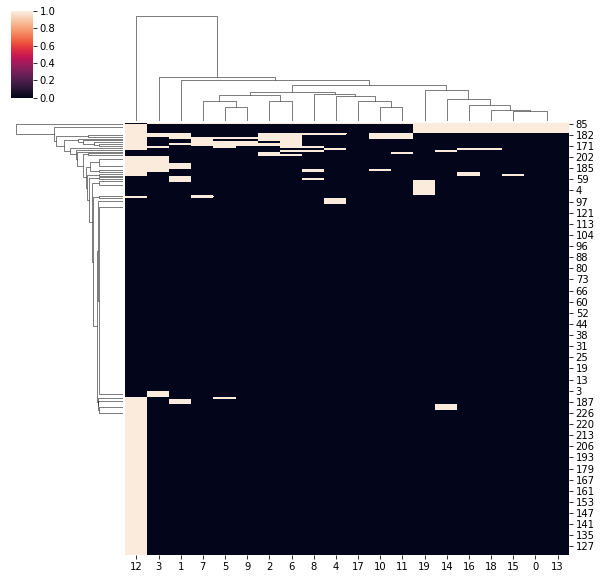

In [5]:
sbn.clustermap(na_mask)

# heatmap w/ matrix 

<Figure size 1080x2880 with 0 Axes>

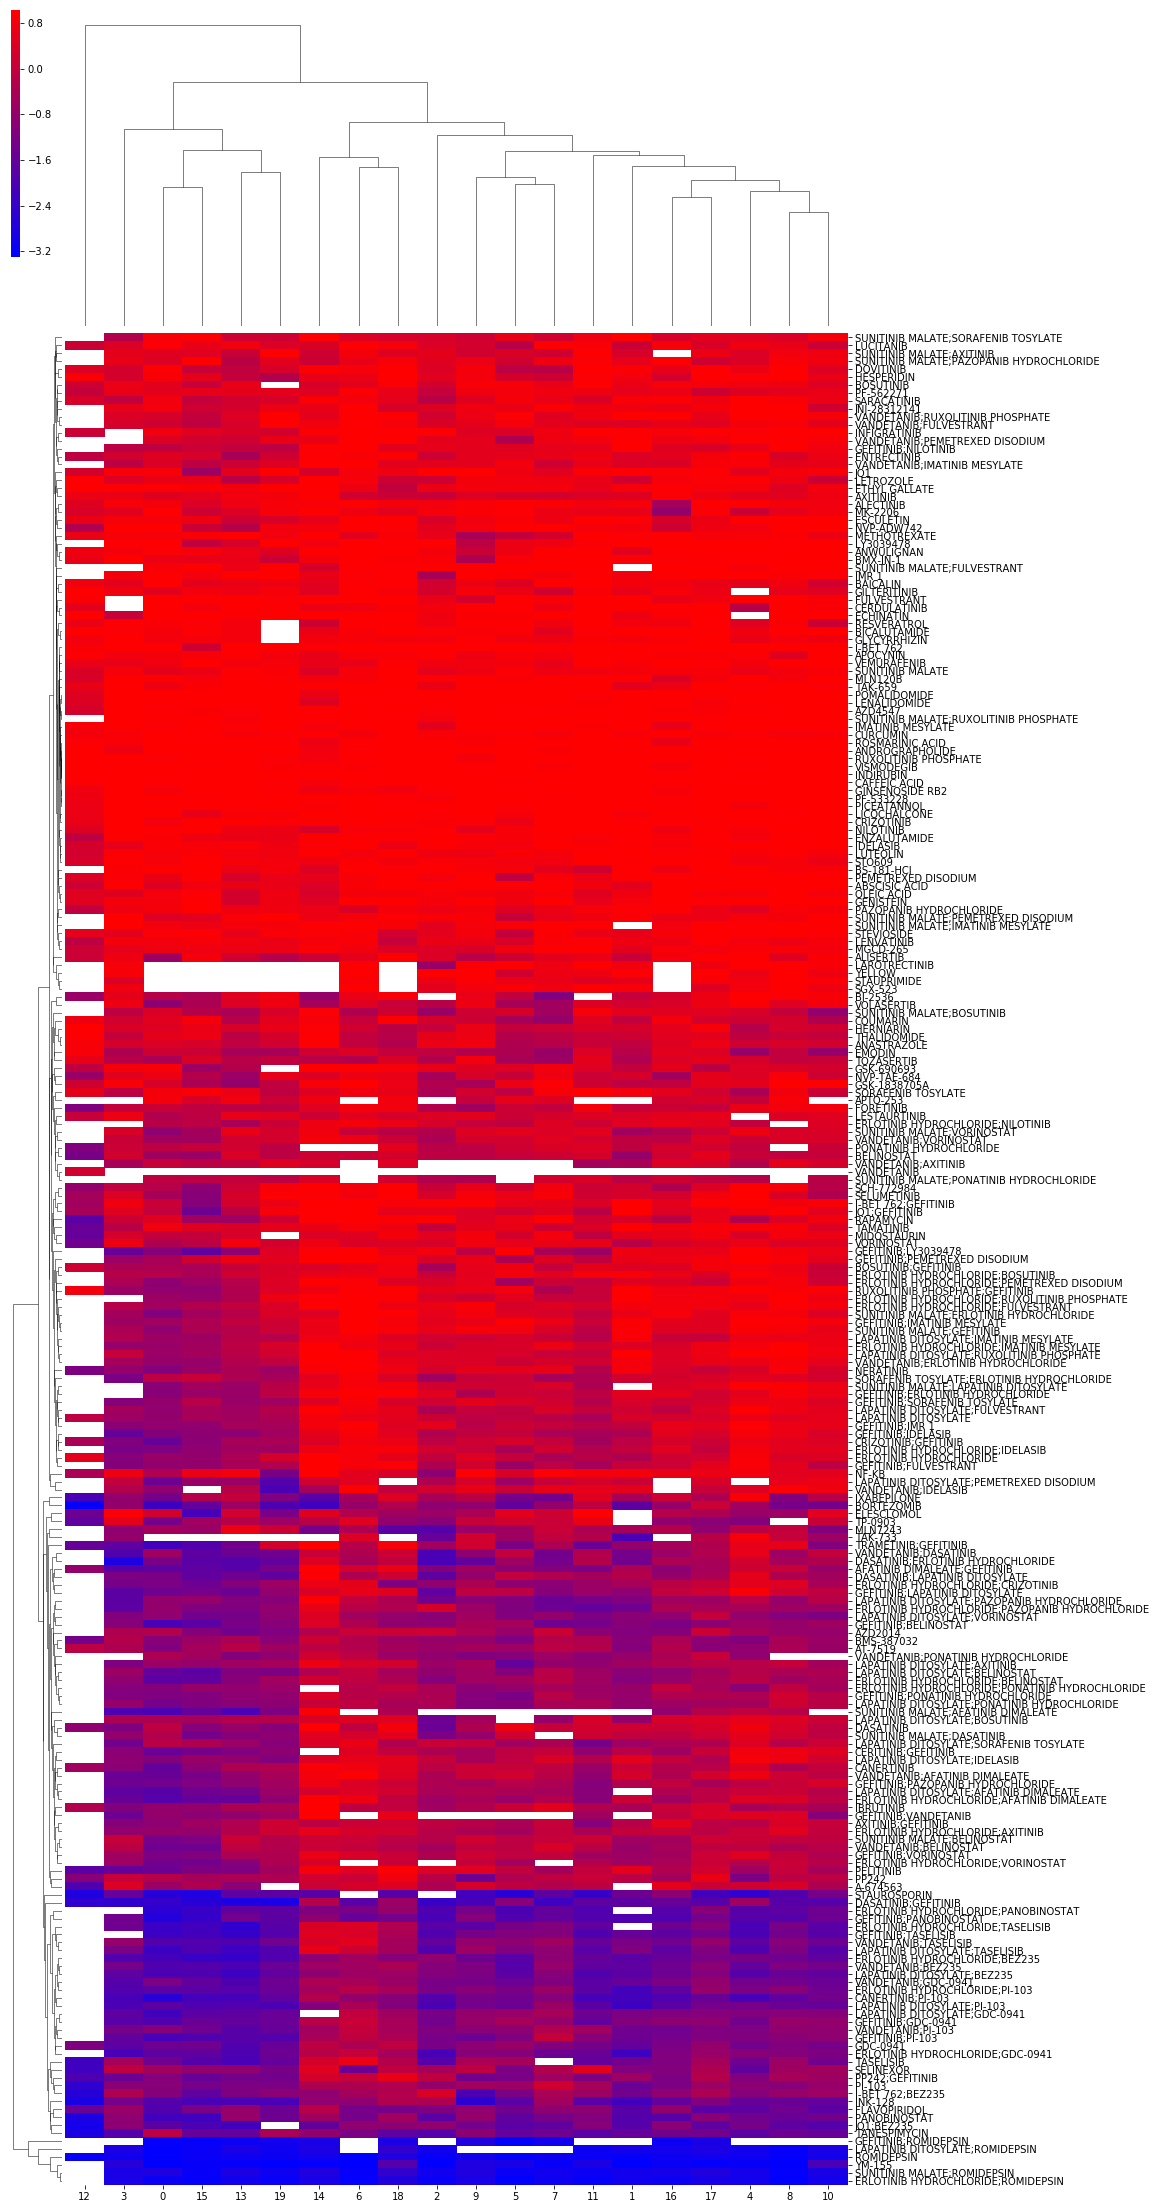

In [6]:
row_linkage = hierarchy.linkage(
    distance.pdist(auc_mat), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(auc_mat.T), method='average')

fsize = (15,40)
plt.figure(figsize=fsize)

res = sbn.clustermap(auc_mat, row_linkage=row_linkage, col_linkage=col_linkage, mask=na_mask, cmap=cmap, yticklabels=1, figsize=fsize)
rows = res.dendrogram_row.reordered_ind
cols = res.dendrogram_col.reordered_ind

inhib_labels = []
for tick_label in res.ax_heatmap.axes.get_yticklabels():
    tick_text = tick_label.get_text()
    inhib_labels.append( inhibs[ int(tick_text) ] )
    # tick_label.set_color(lut[species_name]) #! to change color :D
    
res.ax_heatmap.axes.set_yticklabels(inhib_labels)

plt.show() 

In [7]:
rows = res.dendrogram_row.reordered_ind
cols = res.dendrogram_col.reordered_ind

print(rows)
print(cols)

[217, 1, 128, 143, 57, 71, 8, 51, 119, 99, 162, 174, 74, 200, 206, 54, 138, 93, 41, 55, 83, 20, 21, 72, 108, 5, 225, 68, 75, 185, 216, 29, 97, 33, 95, 110, 2, 4, 10, 120, 89, 46, 49, 35, 104, 66, 107, 65, 165, 118, 50, 16, 94, 103, 18, 24, 80, 122, 25, 109, 26, 123, 78, 79, 67, 11, 52, 223, 114, 101, 86, 100, 64, 176, 208, 113, 53, 124, 102, 228, 232, 230, 231, 58, 137, 154, 42, 112, 84, 98, 28, 70, 12, 30, 116, 15, 183, 44, 105, 199, 153, 203, 48, 60, 171, 85, 197, 34, 38, 39, 81, 17, 7, 6, 106, 227, 151, 63, 160, 179, 22, 202, 192, 148, 164, 204, 177, 166, 193, 207, 121, 219, 186, 201, 129, 152, 88, 226, 220, 92, 144, 125, 141, 40, 156, 158, 36, 77, 45, 59, 149, 229, 62, 211, 215, 43, 163, 155, 213, 210, 221, 140, 181, 146, 82, 90, 196, 127, 130, 161, 190, 194, 195, 168, 214, 76, 173, 222, 117, 159, 37, 150, 167, 188, 209, 13, 169, 91, 136, 135, 147, 134, 172, 3, 19, 87, 69, 14, 184, 191, 187, 198, 178, 205, 131, 180, 189, 126, 224, 139, 218, 133, 175, 142, 145, 56, 212, 115, 73, 32,

# heatmap w/ dataframe

In [8]:
heatmap_data = pd.pivot_table(data, values='auc_zscore', 
                              index=['lab_id'], 
                              columns='inhibitor')

NA_mask_df = heatmap_data.isna() 

heatmap_data[NA_mask_df] = NA_value

heatmap_data.head()


inhibitor,A-674563,ABSCISIC ACID,AFATINIB DIMALEATE;GEFITINIB,ALECTINIB,ALISERTIB,ANASTRAZOLE,ANDROGRAPHOLIDE,ANWULIGNAN,APOCYNIN,APTO-253,...,VANDETANIB;PONATINIB HYDROCHLORIDE,VANDETANIB;RUXOLITINIB PHOSPHATE,VANDETANIB;TASELISIB,VANDETANIB;VORINOSTAT,VEMURAFENIB,VISMODEGIB,VOLASERTIB,VORINOSTAT,YELLOW,YM-155
lab_id,,,,,,,,,,,,,,,,,,,,,
10004,-0.684781,0.442361,-1.693302,0.825797,-0.625197,0.395640,1.018126,0.944524,0.819999,0.836017,...,-0.380805,0.312299,-1.891538,-0.571465,0.748921,1.018126,-0.915194,-0.351320,0.000000,-3.291229
10021,0.000000,0.521809,-0.397696,0.860746,0.074830,-0.042741,0.969073,0.531685,0.992945,0.000000,...,-0.775423,1.018126,-1.249552,-0.085831,0.916199,1.018126,0.234472,-0.204858,0.965552,-3.306391
10054,-0.380927,0.980315,-1.091615,0.797035,0.394253,0.696903,1.018126,0.817471,0.958014,0.000000,...,-0.838160,0.220625,-1.626288,-0.401132,0.776211,1.018126,-0.189504,0.328174,1.018126,-3.281068
10058,0.423353,0.971247,-1.819460,0.888044,0.719684,0.302481,0.723409,0.844775,0.790641,0.000000,...,0.000000,0.395231,-0.764402,0.064824,0.641777,0.998393,0.703488,0.704761,0.880681,-2.662029
10139,0.178714,1.018126,0.167226,0.973475,0.981350,0.184356,0.995759,1.018126,0.938574,0.005970,...,-0.857232,1.018126,-1.721269,0.120647,0.824515,0.959925,0.929832,0.696158,0.695476,-3.176419


<Figure size 2160x720 with 0 Axes>

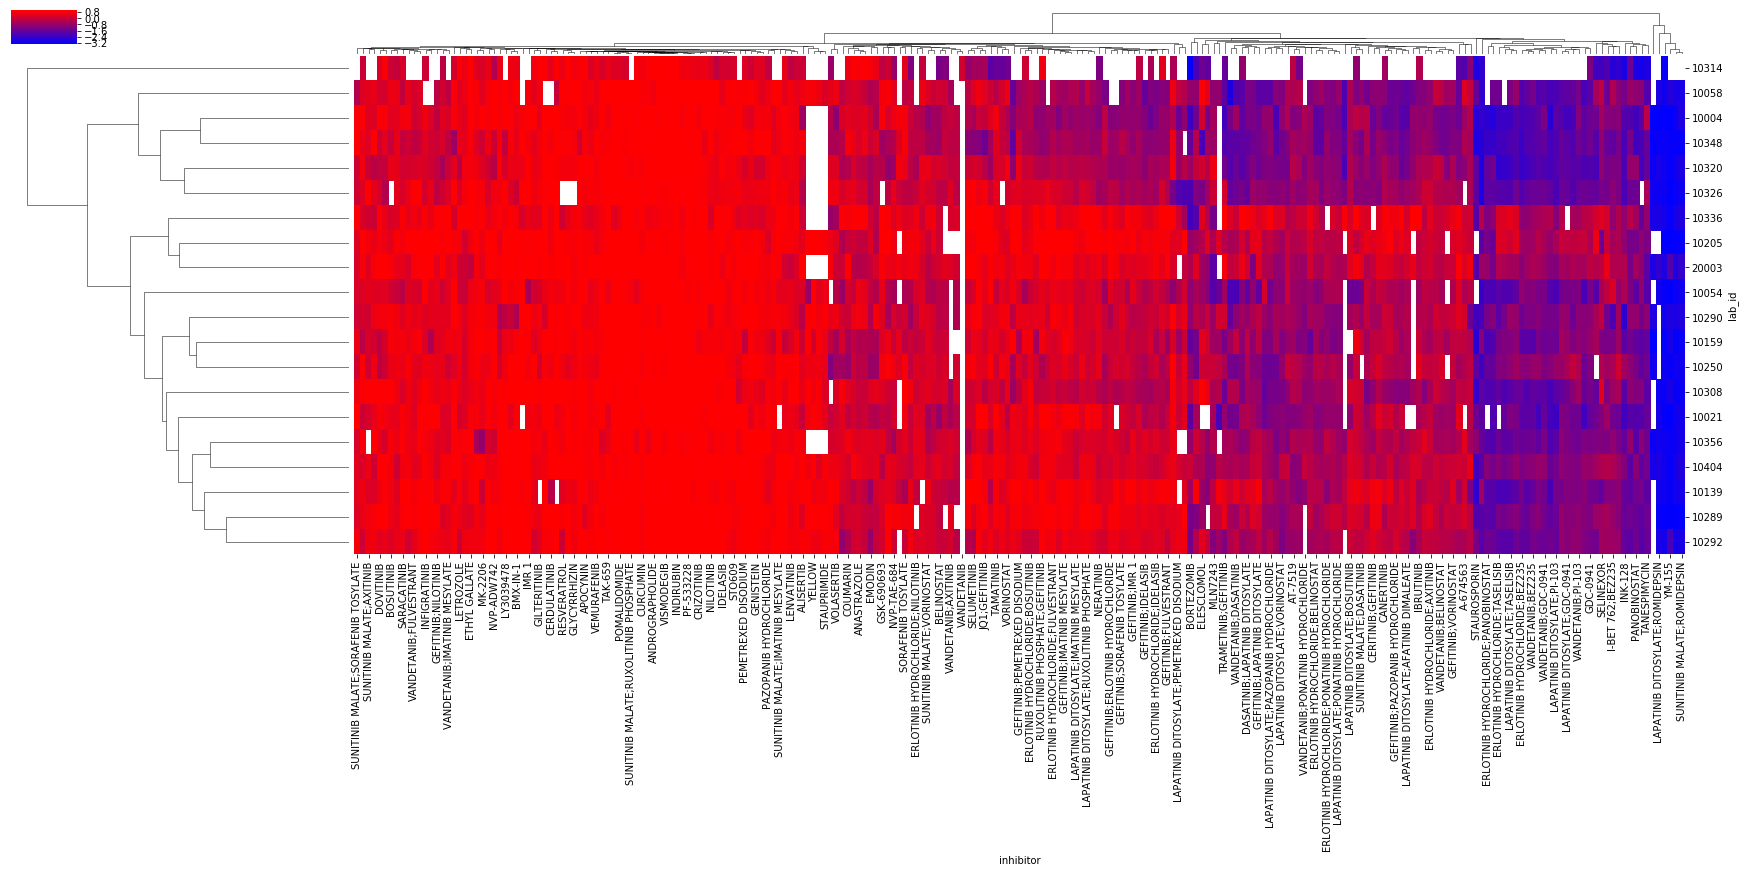

In [9]:
fsize = (30,10)
plt.figure(figsize=fsize)
sbn.clustermap(heatmap_data, figsize=fsize, cmap=cmap, mask=NA_mask_df, yticklabels=1)
plt.show()

# single inhibitors only 

<Figure size 1080x1800 with 0 Axes>

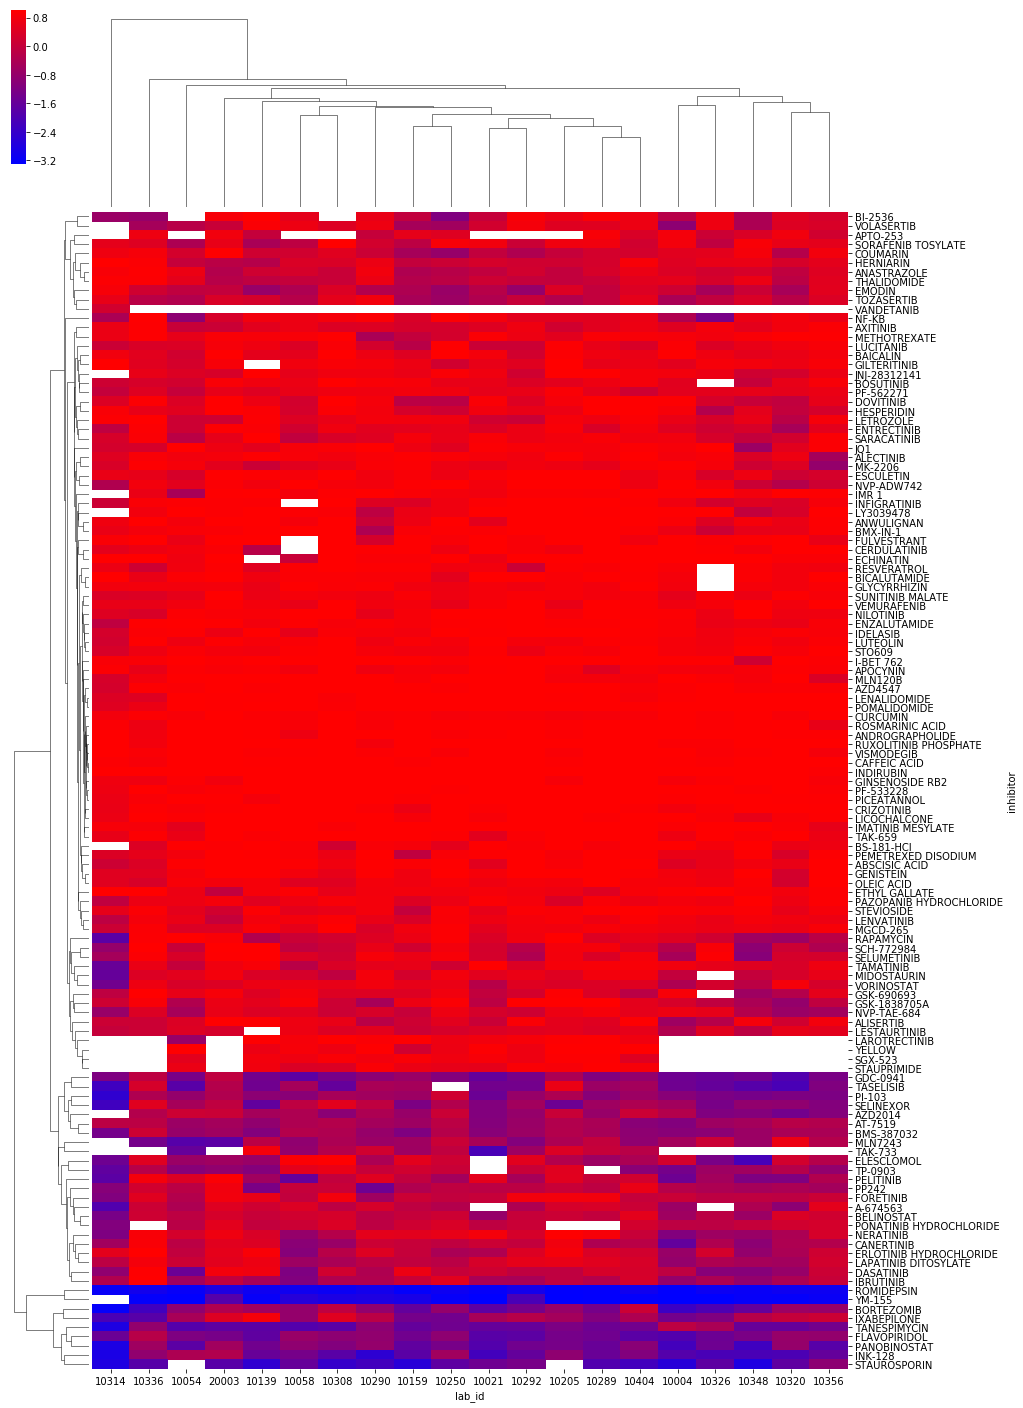

In [10]:
data_nocomb = data[~data.inhibitor.str.contains(';')]

# zscore relative to single agents only?
#data_nocomb = data_nocomb.assign(auc_zscore = lambda x: (x.AUC - data_nocomb.AUC.mean()) / data_nocomb.AUC.std() )

heatmap_data = pd.pivot_table(data_nocomb, values='auc_zscore', 
                              index=['inhibitor'], 
                              columns='lab_id')
NA_mask_df = heatmap_data.isna() 
heatmap_data[NA_mask_df] = NA_value

fsize = (15,25)
plt.figure(figsize=fsize)
sbn.clustermap(heatmap_data, figsize=fsize, cmap=cmap, mask=NA_mask_df, yticklabels=1)
plt.show()

# combination agents only 

<Figure size 1080x1800 with 0 Axes>

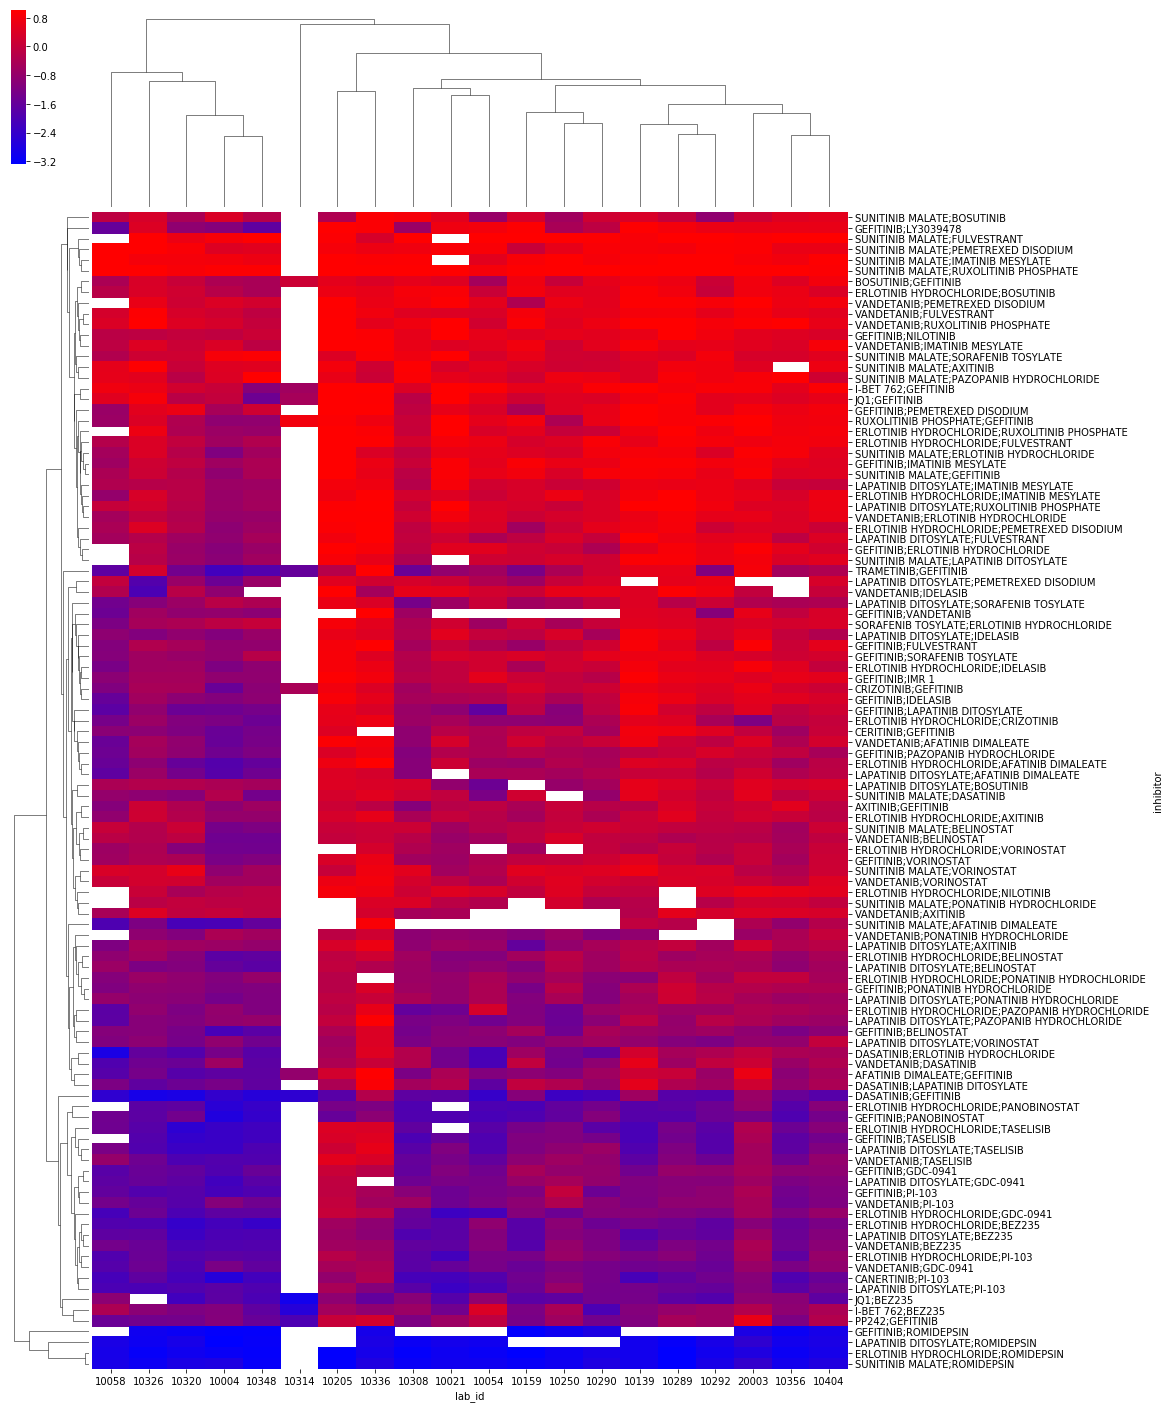

In [11]:
data_comb = data[data.inhibitor.str.contains(';')]

# zscore relative to comb agents only?
#data_comb = data_comb.assign(auc_zscore = lambda x: (x.AUC - data_comb.AUC.mean()) / data_comb.AUC.std() )

heatmap_data = pd.pivot_table(data_comb, values='auc_zscore', 
                              index=['inhibitor'], 
                              columns='lab_id')
NA_mask_df = heatmap_data.isna() 
heatmap_data[NA_mask_df] = NA_value


fsize = (15,25)
plt.figure(figsize=fsize)
sbn.clustermap(heatmap_data, figsize=fsize, cmap=cmap, mask=NA_mask_df, yticklabels=1)
plt.show()

# assign z-scores `within inhibitor`

More realistic to how we think of selective activity. 

In [12]:
zscore = lambda x: (x - x.mean()) / x.std()
data2 = data.assign(AUC_zscore_withinInhib= data.groupby(['inhibitor'])['AUC'].transform(zscore))

data2.head()

,lab_id,inhibitor,AUC,plate_loc,flagged,max_conc,call,replicates,auc_zscore,AUC_zscore_withinInhib
0,10004,JQ1;BEZ235,1.044426,1.0:1.0:A:1.0-7.0,False,10;10,int,1.0,-1.728652,-0.348053
1,10021,JQ1;BEZ235,0.972533,2.0:1.0:A:1.0-7.0,False,10;10,int,1.0,-1.837255,-0.544544
2,10054,JQ1;BEZ235,1.639727,3.0:1.0:A:1.0-7.0,False,10;10,res,1.0,-0.829373,1.278965
3,10058,JQ1;BEZ235,1.573965,4.0:1.0:A:1.0-7.0,False,10;10,res,1.0,-0.928715,1.099232
4,10139,JQ1;BEZ235,1.330817,5.0:1.0:A:1.0-7.0,False,10;10,int,1.0,-1.296021,0.434683


In [26]:
vmax = data2.AUC_zscore_withinInhib.max()
vmin = data2.AUC_zscore_withinInhib.min()
print('vmin, vmax:', (vmin,vmax))
#avg_auc_scaled = 1 - (np.abs((vmax-vmin)/2 + vmin) / (vmax-vmin)) 
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, 'blue'),
                                                    (1, 'white')]
                                        ) 

vmin, vmax: (-4.241076150480122, 2.8953962692163877)


<Figure size 2880x720 with 0 Axes>

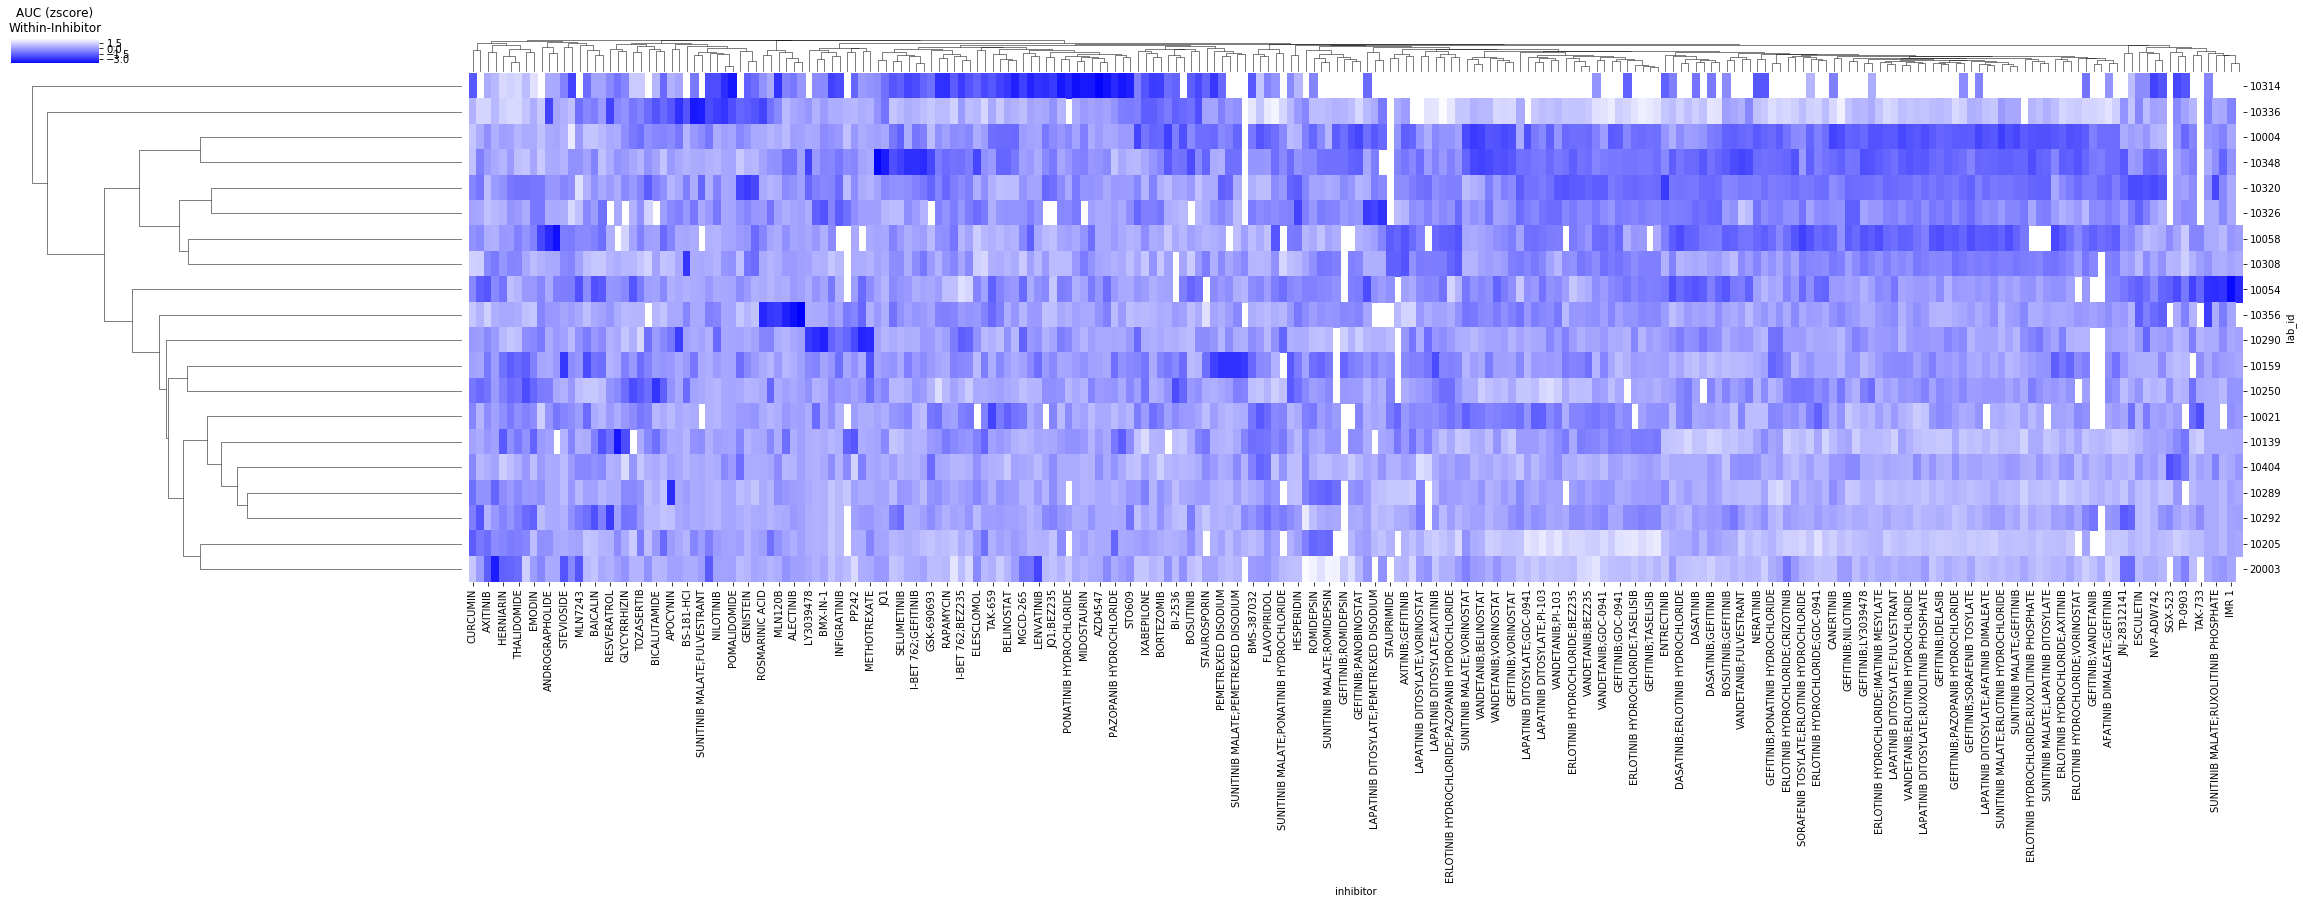

In [30]:
heatmap_data = pd.pivot_table(data2, values='AUC_zscore_withinInhib', 
                              index=['lab_id'], 
                              columns='inhibitor')
NA_mask_df = heatmap_data.isna() 
heatmap_data[NA_mask_df] = NA_value

fsize = (40,10)
plt.figure(figsize=fsize)
sbn.clustermap(heatmap_data, figsize=fsize, cmap=cmap, mask=NA_mask_df, yticklabels=1)

plt.title('AUC (zscore)\nWithin-Inhibitor')
plt.show()

## single agent 

<Figure size 1080x1800 with 0 Axes>

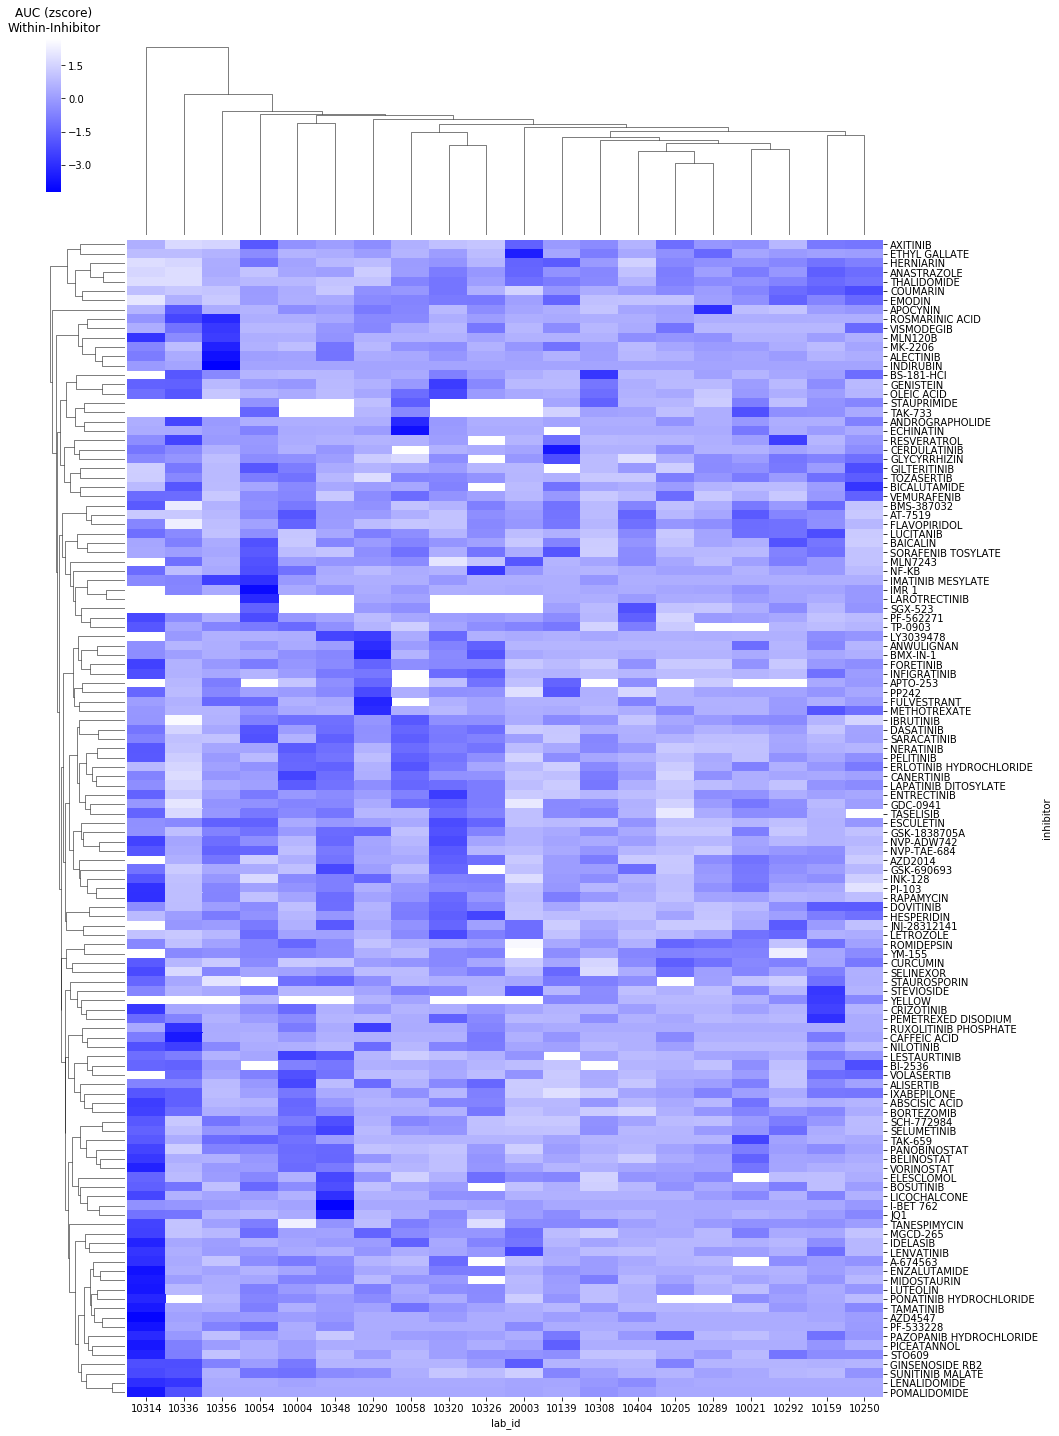

In [28]:
data3 = data2[~data2.inhibitor.str.contains(';')]
heatmap_data = pd.pivot_table(data3, values='AUC_zscore_withinInhib', 
                              index=['inhibitor'], 
                              columns='lab_id')
NA_mask_df = heatmap_data.isna() 
heatmap_data[NA_mask_df] = NA_value

fsize = (15,25)
plt.figure(figsize=fsize)
sbn.clustermap(heatmap_data, figsize=fsize, cmap=cmap, mask=NA_mask_df, yticklabels=1)

plt.title('AUC (zscore)\nWithin-Inhibitor')
plt.show()

## combination agent 

<Figure size 1080x1800 with 0 Axes>

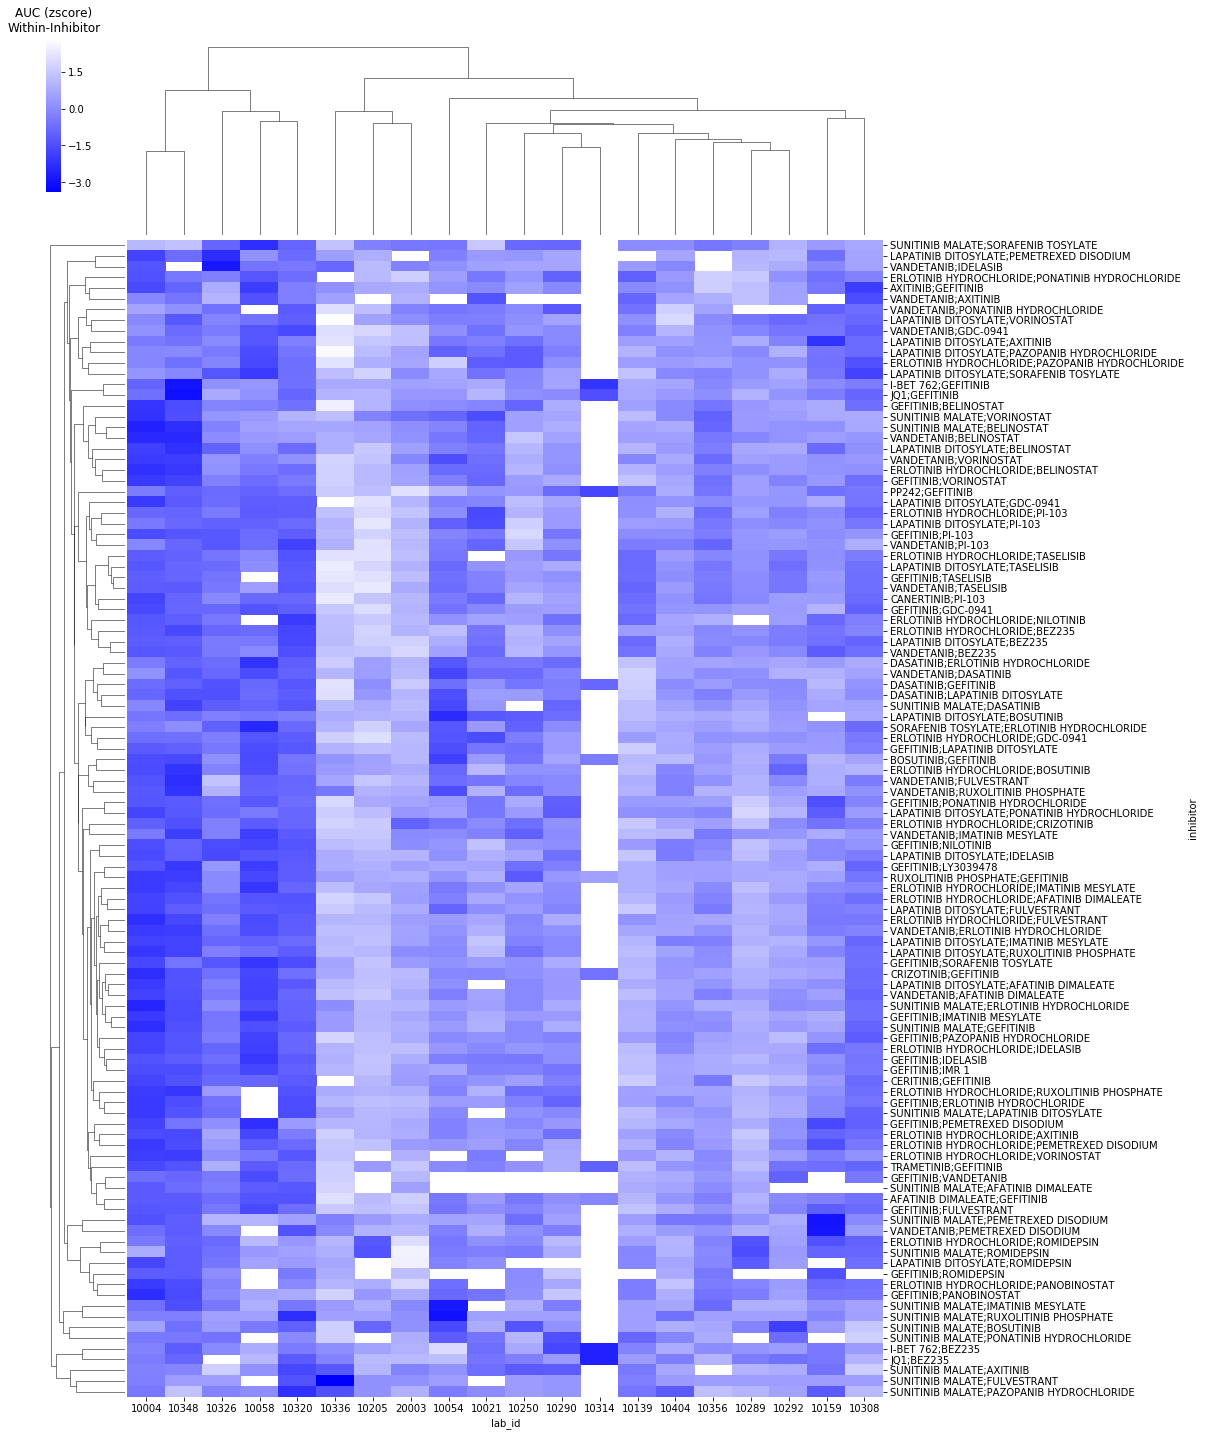

In [29]:
data3 = data2[data2.inhibitor.str.contains(';')]

heatmap_data = pd.pivot_table(data3, values='AUC_zscore_withinInhib', 
                              index=['inhibitor'], 
                              columns='lab_id')
NA_mask_df = heatmap_data.isna() 
heatmap_data[NA_mask_df] = NA_value

fsize = (15,25)
plt.figure(figsize=fsize)
sbn.clustermap(heatmap_data, figsize=fsize, cmap=cmap, mask=NA_mask_df, yticklabels=1)

plt.title('AUC (zscore)\nWithin-Inhibitor')
plt.show()